In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nsimpkg.random_variables import NormalRV, MixNormalRV, average_normal_dist
from nsimpkg.gaussian_OAIS import AdaGrad_OAIS
from nsimpkg.mcsim import mcsim, rho
from nsimpkg.plotting import plot_contours, plotter, fill_z
np.random.seed(0)

plt.rcParams['figure.dpi'] = 300

q = NormalRV(np.array([10, -10]), np.array([[40, 0], [0, 40]]))
pi = NormalRV(np.array([1, -1]), np.array([[2, -0.5], [-0.5, 2]]))
GT = 0.195595

def phi(x):
    return (np.sum(np.abs(x) < 1, axis=0) == 2).astype(int)

N = 1000
Niter = 3*int(1e4)
alpha_AdaGrad = 1e-1
nexperiments = 10
results_array_AdaGrad = []
distribution_array_AdaGrad = []
for _ in range(nexperiments):
    r_AdaGrad, d_AdaGrad = AdaGrad_OAIS(phi, pi, q, N, Niter, alpha=alpha_AdaGrad)
    results_array_AdaGrad.append(r_AdaGrad)
    distribution_array_AdaGrad.append(d_AdaGrad)

  0%|          | 0/30000 [00:00<?, ?it/s]

100%|██████████| 30000/30000 [05:15<00:00, 94.97it/s] 


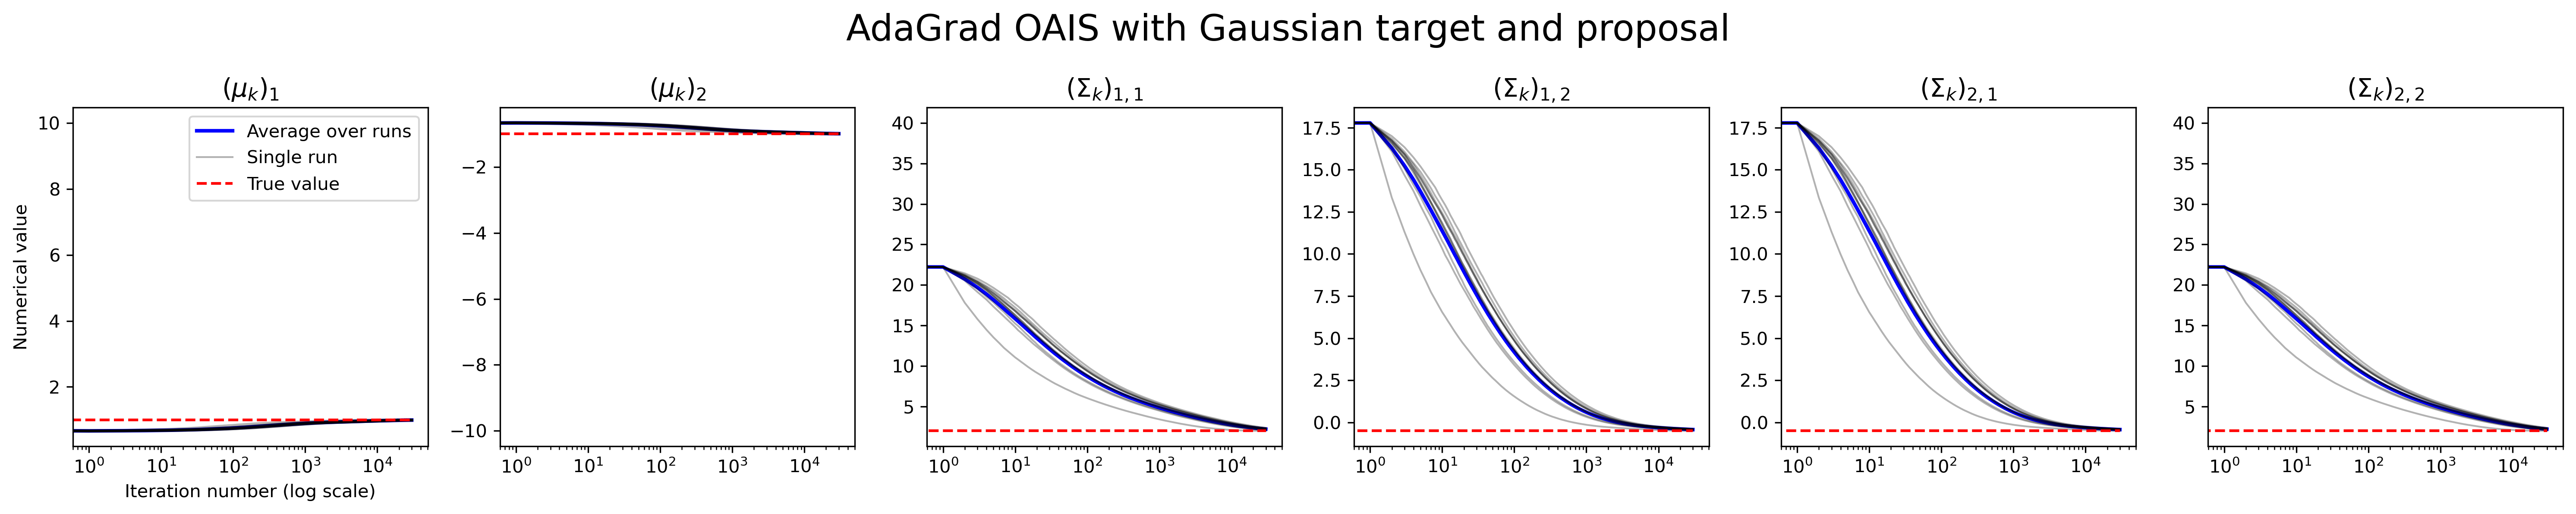

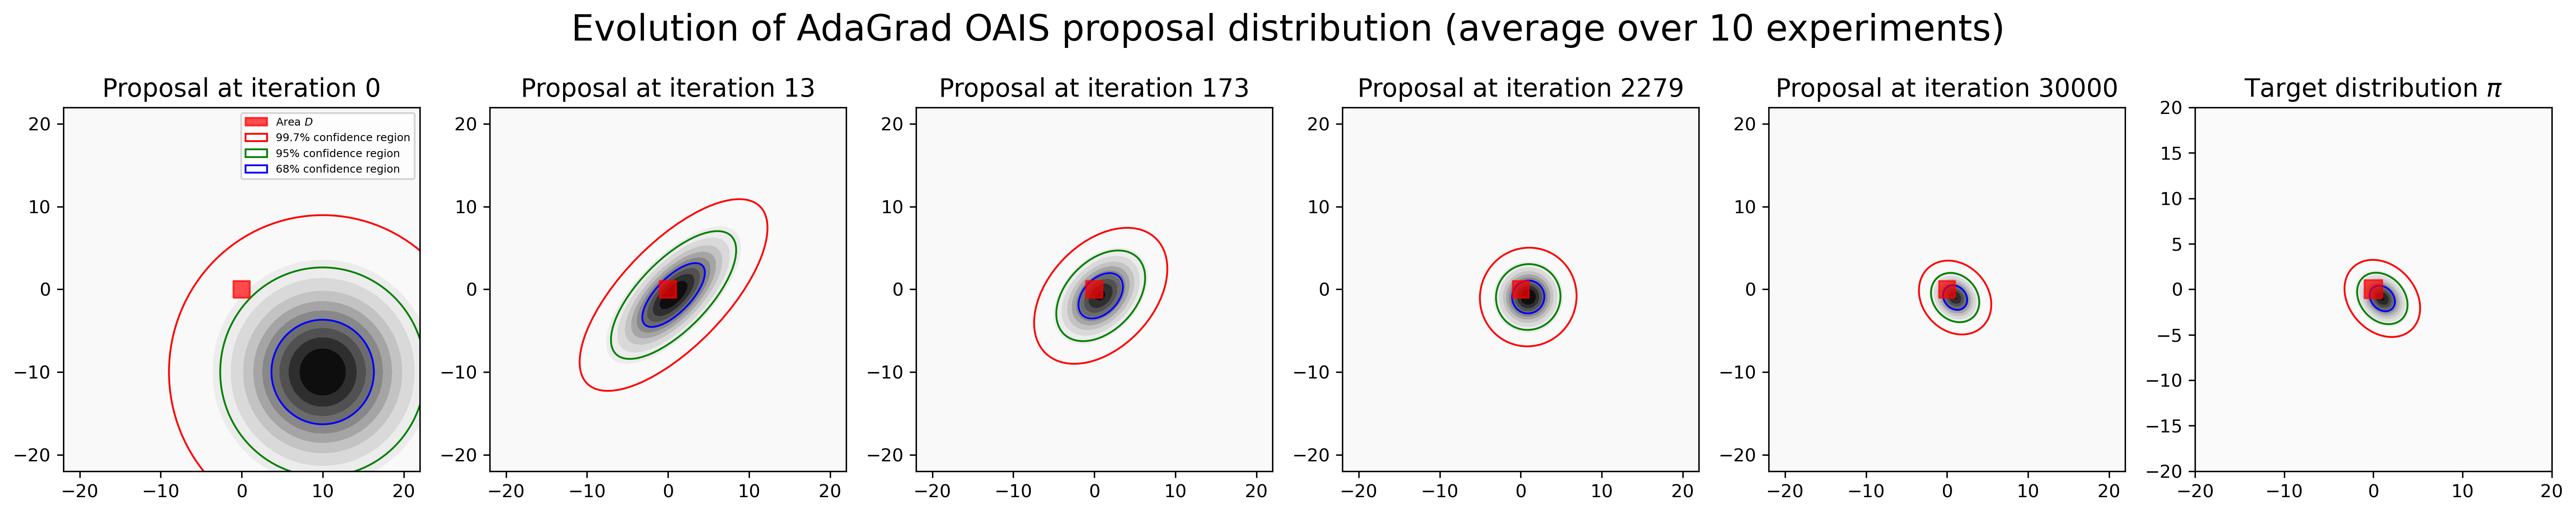

In [7]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter, plot_contours, plot_mse
optimiser = "AdaGrad"
title = f"{optimiser} OAIS with Gaussian target and proposal"
plotter(distribution_array_AdaGrad, pi, title=title, mix=False, alpha=0.3)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/params_evolution.png")
plt.show()
plot_contours(distribution_array_AdaGrad, pi, title=f"Evolution of {optimiser} OAIS proposal distribution (average over {nexperiments} experiments)", mix=False)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/{optimiser}_contours.png")
plt.show()

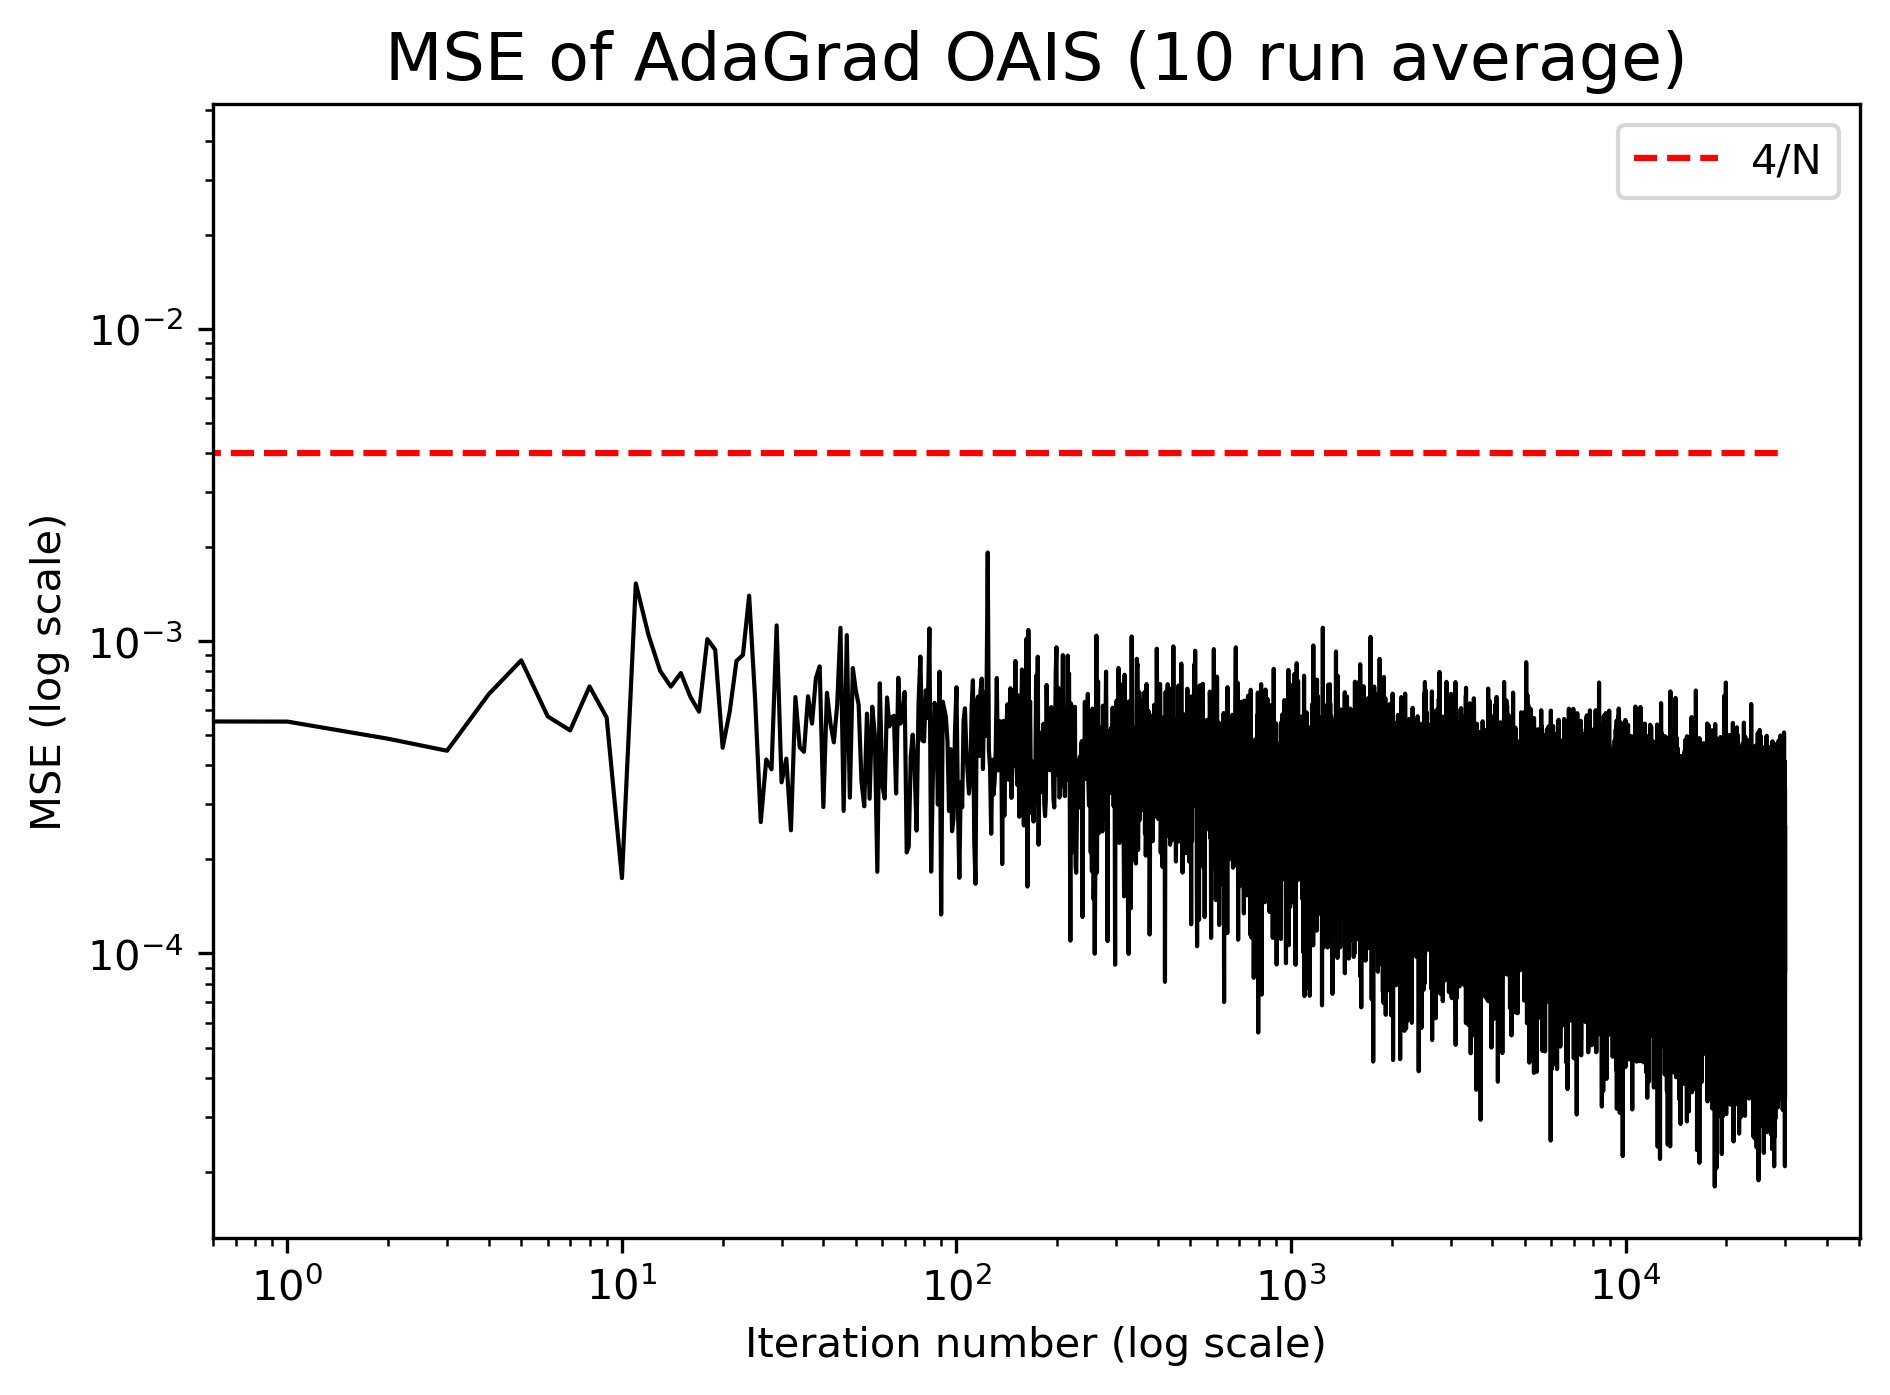

In [ ]:
plot_mse(results_array_AdaGrad, GT, title=f"MSE of {optimiser} OAIS (average over {nexperiments} experiments)", xlog=True, ylog=True)
plt.title(f"MSE of {optimiser} OAIS ({nexperiments} run average)", fontsize=16)
plt.hlines(4/N, 0, Niter, colors='r', linestyles='dashed', label="4/N")
plt.legend()
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/mse.png")
plt.show()